## MultinomialNB Implementation on scaled reduced dataset with PCA

In [24]:
# Utilities
import pandas as pd
import warnings
import numpy as np
import matplotlib.pyplot as plt

# Models
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, accuracy_score, f1_score
from sklearn.metrics import classification_report, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay

In [5]:
seed = 23

In [6]:
df_scaled = pd.read_csv('../../Data/dataset_preprocessed.csv')

In [22]:
columns = df_scaled.columns

In [9]:
print(df_scaled.head(10))

   releaseYear  runtimeMinutes  lifetimeGross  nrOfReleases  \
0     0.798077        0.186170       0.000039      0.205128   
1     0.932692        0.186170       0.000017      0.102564   
2     0.826923        0.425532       0.002121      0.525641   
3     0.894231        0.276596       0.000094      0.410256   
4     0.903846        0.239362       0.000094      0.038462   
5     0.798077        0.430851       0.055284      0.653846   
6     0.836538        0.313830       0.000010      0.166667   
7     0.836538        0.361702       0.000010      0.025641   
8     0.875000        0.478723       0.107309      0.615385   
9     0.596154        0.351064       0.011064      0.641026   

   director_nrOfMovies  nrOfEmployees  nrOfActors  averageRating  numVotes  \
0             0.022495       0.410256    0.384615              1  0.003324   
1             0.006135       0.538462    0.384615              0  0.000051   
2             0.092025       0.538462    0.423077              1  0.0344

In [27]:
df_pca_train = pd.read_csv('../../DimensionalityReductionData/X_train_PCA.csv', names=columns)

In [28]:
print(df_pca_train.head(10))

   releaseYear  runtimeMinutes  lifetimeGross  nrOfReleases  \
0     0.230656       -0.540199       0.275241      0.348734   
1    -0.578532       -0.273813      -0.207024      0.202237   
2    -0.207271        1.096294      -0.124524     -0.014919   
3    -0.549501       -0.271749       0.166219      0.161220   
4    -0.605220       -0.210550      -0.406984      0.455269   
5    -0.623006       -0.467437      -0.599140      0.760850   
6    -0.536403       -0.110307      -0.009713     -0.235516   
7     0.547014       -0.806070      -0.311956     -0.267277   
8     0.290048       -0.609070       1.100686     -0.121043   
9    -0.100539        0.690563      -0.161727      0.066356   

   director_nrOfMovies  nrOfEmployees  nrOfActors  averageRating  numVotes  \
0             0.442168      -0.244893   -0.305579      -0.388014  0.483440   
1             0.438744      -0.422858    0.108360      -0.469457  0.476055   
2             0.302102       0.276747    0.024807      -0.079499  0.0169

In [29]:
df_pca_test = pd.read_csv('../../DimensionalityReductionData/X_test_PCA.csv', names = columns)

In [30]:
labels = df_scaled['averageRating']
_, _, y_train, y_test = train_test_split(df_scaled.drop(columns=['averageRating']), labels, test_size=0.2, random_state=42)

df_pca_train['averageRating'] = y_train.reset_index(drop=True)
df_pca_test['averageRating'] = y_test.reset_index(drop=True)

In [13]:
df_scaled.head()

,releaseYear,runtimeMinutes,lifetimeGross,nrOfReleases,director_nrOfMovies,nrOfEmployees,nrOfActors,averageRating,numVotes,sameYearTotalMoviesReleased,...,Music,Musical,Mystery,Other,Romance,Sci-Fi,Sport,Thriller,War,Western
0,0.798077,0.186170,0.000039,0.205128,0.022495,0.410256,0.384615,1,0.003324,0.248557,...,0,0,0,0,0,0,0,0,0,0
1,0.932692,0.186170,0.000017,0.102564,0.006135,0.538462,0.384615,0,0.000051,0.912407,...,0,0,0,0,1,0,0,0,0,0
2,0.826923,0.425532,0.002121,0.525641,0.092025,0.538462,0.423077,1,0.034478,0.347696,...,0,0,0,0,0,0,0,0,0,0
3,0.894231,0.276596,0.000094,0.410256,0.085890,0.487179,0.384615,0,0.024388,0.719691,...,0,0,0,0,0,0,0,0,0,0
4,0.903846,0.239362,0.000094,0.038462,0.006135,0.282051,0.153846,0,0.000032,0.754540,...,0,0,0,0,0,0,0,0,0,0


In [15]:
#df_scaled_sample = df_scaled.sample(n=1000, random_state=seed)
df_scaled_sample = df_scaled

Save and print metrics

In [31]:
def calculate_metrics(model_name, y_true, y_pred):
    metrics = {
        'Accuracy': accuracy_score(y_true, y_pred),
        'Weighted F1': f1_score(y_true, y_pred, average='weighted'),
        'Weighted Precision': precision_score(y_true, y_pred, average='weighted', zero_division=0),
        'Weighted Recall': recall_score(y_true, y_pred, average='weighted'),
        'Macro-Averaged Precision': precision_score(y_true, y_pred, average='macro', zero_division=0),
        'Macro-Averaged Recall': recall_score(y_true, y_pred, average='macro'),
        'F1': str(f1_score(y_true, y_pred, average=None)),
        'Precision': str( precision_score(y_true, y_pred, average=None, zero_division=0)),
    }

    # Print the metrics
    print(f"Metrics for {model_name}:")
    for metric_name, metric_value in metrics.items():
        try:
            print(f"{metric_name}: {metric_value:.4f}")
        except:
            print(f"{metric_name}: {metric_value}")

    # Print the classification report
    print("classification report")
    report = classification_report(y_true, y_pred, target_names=['Class 0', 'Class 1'], zero_division=0)
    print(report)

    print("Confusion Matrix")
    cm = confusion_matrix(y_true, y_pred)
    cmd = ConfusionMatrixDisplay(confusion_matrix=cm)
    cmd.plot()

    plt.title(f'Confusion matrix for model {model_name} (Accuracy:{metrics["Accuracy"]:.4f})')
    plt.show()

    # Create df to store metrics
    df_metrics = pd.DataFrame(metrics, index=[model_name])

    return df_metrics

In [35]:
# # Replace negative values with 0.0
df_pca_train = df_pca_train.clip(lower=0)
df_pca_test = df_pca_test.clip(lower=0)

df_pca_train.fillna(0.0, inplace=True)
df_pca_test.fillna(0.0, inplace=True)
model = MultinomialNB()
model.fit(df_pca_train[1:], y_train)

predictions = model.predict(df_pca_test)
print("Accuracy:", accuracy_score(y_test, predictions))

print("F1 score:", f1_score(y_test, predictions, average=None))

Accuracy: 0.5539640239840107
F1 score: [0.59559046 0.502785  ]


## Grid Search CV - 1

In [37]:
param_grid = {
    'alpha' : [0.5, 0.75, 1.0],
    'fit_prior' : [True, False]
}

model = MultinomialNB()

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='accuracy')
grid_search.fit(df_pca_train[1:], y_train)

print("The parameters with the highest score: ", grid_search.best_params_)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
The parameters with the highest score:  {'alpha': 1.0, 'fit_prior': False}


In [38]:
cv_results_df = pd.DataFrame(grid_search.cv_results_)

# Show top 10 parameters for this model
minimalistic_results = cv_results_df[['params', 'mean_test_score']]
sorted_results = minimalistic_results.sort_values(by='mean_test_score', ascending=False)

print(sorted_results.head(10))

                                params  mean_test_score
5   {'alpha': 1.0, 'fit_prior': False}         0.589641
1   {'alpha': 0.5, 'fit_prior': False}         0.589558
3  {'alpha': 0.75, 'fit_prior': False}         0.589558
2   {'alpha': 0.75, 'fit_prior': True}         0.589475
4    {'alpha': 1.0, 'fit_prior': True}         0.589475
0    {'alpha': 0.5, 'fit_prior': True}         0.589391


Metrics for MNB-PCA-GS-CV1:
Accuracy: 0.5466
Weighted F1: 0.5439
Weighted Precision: 0.5475
Weighted Recall: 0.5466
Macro-Averaged Precision: 0.5476
Macro-Averaged Recall: 0.5464
F1: [0.57954897 0.50813155]
Precision: [0.54157044 0.55354331]
classification report
              precision    recall  f1-score   support

     Class 0       0.54      0.62      0.58      1505
     Class 1       0.55      0.47      0.51      1497

    accuracy                           0.55      3002
   macro avg       0.55      0.55      0.54      3002
weighted avg       0.55      0.55      0.54      3002

Confusion Matrix


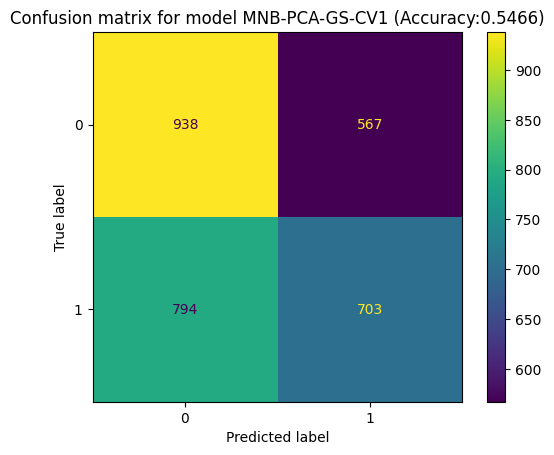

In [40]:
best_model = grid_search.best_estimator_
predictions = best_model.predict(df_pca_test)
_ = calculate_metrics('MNB-PCA-GS-CV1', y_test, predictions)

In [42]:
# Predicting using other alternatives of fine-tuning from top 10 performances
other_alternatives = []
# Choose a set of parameters from sorted_results
for i in range(5):

  params = sorted_results.iloc[i]['params']
  print("Parameters from place: ", i, " ", params)

  model = MultinomialNB(**params)
  model.fit(df_pca_train[1:], y_train)

  predictions = model.predict(df_pca_test)

  chosen_accuracy = accuracy_score(y_test, predictions)
  print("Accuracy for chosen parameters:", chosen_accuracy)
  other_alternatives.append((chosen_accuracy,params))


Parameters from place:  0   {'alpha': 1.0, 'fit_prior': False}
Accuracy for chosen parameters: 0.5466355762824784
Parameters from place:  1   {'alpha': 0.5, 'fit_prior': False}
Accuracy for chosen parameters: 0.5466355762824784
Parameters from place:  2   {'alpha': 0.75, 'fit_prior': False}
Accuracy for chosen parameters: 0.5466355762824784
Parameters from place:  3   {'alpha': 0.75, 'fit_prior': True}
Accuracy for chosen parameters: 0.5539640239840107
Parameters from place:  4   {'alpha': 1.0, 'fit_prior': True}
Accuracy for chosen parameters: 0.5539640239840107


In [43]:
# get best from top 10
best_tuple = max(other_alternatives, key=lambda x: x[0])

In [44]:
print("Best accuracy and parameters after running the algorithm using other alternatives of fine tuning from top 10 performances")
print(best_tuple[0])
print(best_tuple[1])

Best accuracy and parameters after running the algorithm using other alternatives of fine tuning from top 10 performances
0.5539640239840107
{'alpha': 0.75, 'fit_prior': True}


In [47]:
best_accuracy = 0
best_report = None
best_predictions = None
y_best_predictions = None
all_reports = []

for i in range(100):
  random_state_fit = np.random.randint(1000)

  test_size = 0.2
  X_train, X_test, y_train, y_test = train_test_split(
    df_scaled_sample.drop('averageRating', axis=1),
    df_scaled_sample['averageRating'], test_size=test_size,
    random_state=random_state_fit)


  model = MultinomialNB(**best_tuple[1])
  model.fit(X_train, y_train)

  predictions = model.predict(X_test)
  current_accuracy = accuracy_score(y_test, predictions)

  report = classification_report(y_test, predictions, output_dict=True, zero_division=0)
  all_reports.append(report)
  print(current_accuracy)

  if current_accuracy > best_accuracy:
        best_accuracy = current_accuracy
        best_report = report
        best_predictions = predictions
        y_best_predictions = y_test

def average_classification_report(reports):
    metrics = ['precision', 'recall', 'f1-score']
    avg_report = {}
    for metric in metrics:
        avg_report[metric] = sum(r['macro avg'][metric] for r in reports) / len(reports)
    avg_report['accuracy'] = sum(r['accuracy'] for r in reports) / len(reports)
    return avg_report

avg_report = average_classification_report(all_reports)

print("Best Classification Report:")
print(classification_report(y_best_predictions, best_predictions, zero_division=0))
print("Best Accuracy:", best_accuracy)
print()
print("Average Classification Report:")
for metric, score in avg_report.items():
    print(f"{metric}: {score:.4f}")

0.6728847435043305
0.6758827448367755
0.6822118587608261
0.6742171885409727
0.6688874083944037
0.6718854097268487
0.6652231845436376
0.6855429713524317
0.6685542971352432
0.6598934043970687
0.6808794137241839
0.6682211858760826
0.6655562958027982
0.6685542971352432
0.6705529646902065
0.6685542971352432
0.6652231845436376
0.6862091938707529
0.6778814123917388
0.6615589606928715
0.6708860759493671
0.6788807461692206
0.6615589606928715
0.679213857428381
0.6628914057295137
0.6692205196535643
0.6585609593604264
0.6685542971352432
0.6828780812791473
0.6545636242504996
0.6772151898734177
0.6625582944703531
0.6828780812791473
0.6608927381745503
0.6798800799467022
0.6585609593604264
0.676215856095936
0.670219853431046
0.6725516322451699
0.6775483011325782
0.6642238507661559
0.6778814123917388
0.6745502998001333
0.6802131912058628
0.6885409726848768
0.6652231845436376
0.679213857428381
0.6718854097268487
0.6668887408394404
0.6718854097268487
0.6518987341772152
0.6778814123917388
0.67888074616922

Metrics for MNB-PCA-Shuffled_best:
Accuracy: 0.6885
Weighted F1: 0.6842
Weighted Precision: 0.6956
Weighted Recall: 0.6885
Macro-Averaged Precision: 0.6964
Macro-Averaged Recall: 0.6857
F1: [0.72443266 0.64189966]
Precision: [0.66289105 0.72996516]
classification report
              precision    recall  f1-score   support

     Class 0       0.66      0.80      0.72      1539
     Class 1       0.73      0.57      0.64      1463

    accuracy                           0.69      3002
   macro avg       0.70      0.69      0.68      3002
weighted avg       0.70      0.69      0.68      3002

Confusion Matrix


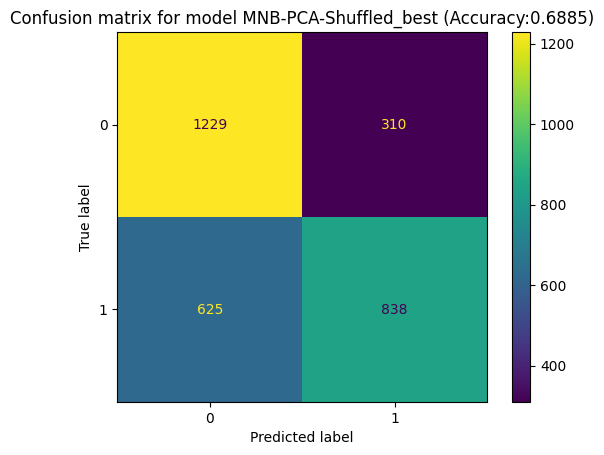

,Accuracy,Weighted F1,Weighted Precision,Weighted Recall,Macro-Averaged Precision,Macro-Averaged Recall,F1,Precision
MNB-PCA-Shuffled_best,0.688541,0.684211,0.695579,0.688541,0.696428,0.685683,[0.72443266 0.64189966],[0.66289105 0.72996516]


In [48]:
calculate_metrics('MNB-PCA-Shuffled_best', y_best_predictions, best_predictions)